## Homework 2 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday 14 February, 2025

In [1]:
# Import statements. I have taken code from the deltachi2.ipynb file for problem 3.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import chi2

from tqdm import trange

mpl.rc('font', size=18)

### Problem 1 : The Super Bowl
**

---
#### a).


#### b).

### Problem 2 : The Mean, Variance, and Covariance
*We consider a random variable $x$ and constants $a$ and $b$.*

---
*a). We first wish to show that $\langle ax+b\rangle = a\langle x \rangle + b$*

By definition of the expectation value, we may write the first expression as

$$\langle ax+b\rangle = \int dx ~(ax+b) ~ p(x|I)$$
Then, we may split the integral as 
$$\int dx ~ax ~ p(x|I) + \int dx ~ b p(x|I)$$
Which is 
$$a \int dx ~ x ~ p(x|I) + b \int dx ~ p(x|I)$$
The first integral is just the expectation of $x$, and the second is 1 since the probability is normalized. Hence, we see that this is 
$$a\langle x \rangle + b$$
as desired.

Next, we wish to show that the variance of this is $a^2 {\rm var}(x)$. The variance of $ax+b$ is, by definition, 

$$ {\rm var}(ax+b) = \langle ((ax+b)-a\langle x \rangle -b)^2\rangle$$
using the above expression for the expectation. Simplifying, this becomes

$${\rm var}(ax+b) =\langle(ax - a\langle x\rangle)\rangle^2$$ 

Since $a$ is scalar, we may pull out its square from the expectation, giving us
$$a^2 \langle(x - \langle x\rangle)\rangle^2 = a^2 {\rm var}(x)$$
as desired.


*b).*

*c).*

### Problem 3 : Fitting the $\chi^2$ Distribution
*We consider the 1000 data sets generated from $y=f(x)=x$ with 10 data points below from the `deltachi2.ipynb` file.*

*a).* We first wish to calculate the $\chi^2$ assuming the model is $f(x)=x$. So, we define a linear fit function below that is just $x$:

In [2]:
def chi2x(params,x,y,sigma):
    'A riveting function.'
    return np.sum(((y - x)/sigma)**2)

Now, we calculate the $\chi^2$, which is

In [3]:
## Generating Data

# Independent variable.
N = 10
x = np.linspace(1, 10, N)
sigma_y=2
# Generate random data.
Nmc = 10000
xchi2 = []

for i in trange(0, Nmc):
    y = x+sigma_y*np.random.randn(N)
    resx = minimize(chi2x, [1], args=(x,y,sigma_y), method='BFGS')

    #resx = x
    #chi2_x = np.sum((y-resx)**2)
    #dchi2.append(chi2_x)
    if resx.success:
        xchi2.append(resx.fun)

100%|██████████| 10000/10000 [00:00<00:00, 22434.62it/s]


In [4]:
print(np.mean(xchi2), np.std(xchi2)**2)

9.944716086035982 19.90133277043735


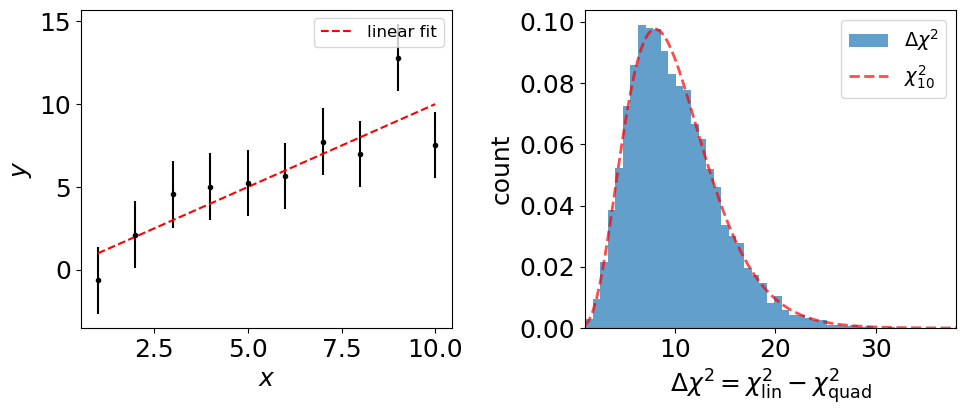

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

ax1.errorbar(x, y, yerr=sigma_y, fmt='.', color='k')
ax1.plot(x, x, 'r--', label='linear fit')

ax1.set(xlabel='$x$', ylabel='$y$')
ax1.legend(fontsize=12)

# Histogram the delta-chi2 values.
dmin = np.floor(np.min(xchi2))
dmax = np.ceil(np.max(xchi2))
ax2.hist(xchi2, bins=np.linspace(dmin, dmax, 50),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

# Plot the chi2 function with 1 DOF.
df = 10
_x = np.linspace(dmin, dmax, 100)
rv = chi2(df)
ax2.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{{10}}$')

ax2.set(xlabel=r'$\Delta\chi^2=\chi^2_{\mathrm{lin}}-\chi^2_{\mathrm{quad}}$',
        xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

We see that the number of DoF is the mean of the $\chi^2$, which is about 10. We know that it *should* indeed be 10, as we have 10 data points and zero parameters.

*b).* Next, we wish to find the best-fit linear model, $f(x)=mx+b$ and find the $\chi^2$ doing this.

In [6]:
def chi2l(params,x,y,sigma):
    'A riveting function.'
    m,b = params
    return np.sum(((y - (m*x+b)) / sigma)**2)

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 2

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,sigma_y), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)

100%|██████████| 10000/10000 [00:03<00:00, 3267.95it/s]


In [7]:
print(np.mean(lchi2), np.std(lchi2)**2)

8.067280149608404 16.21667741785953


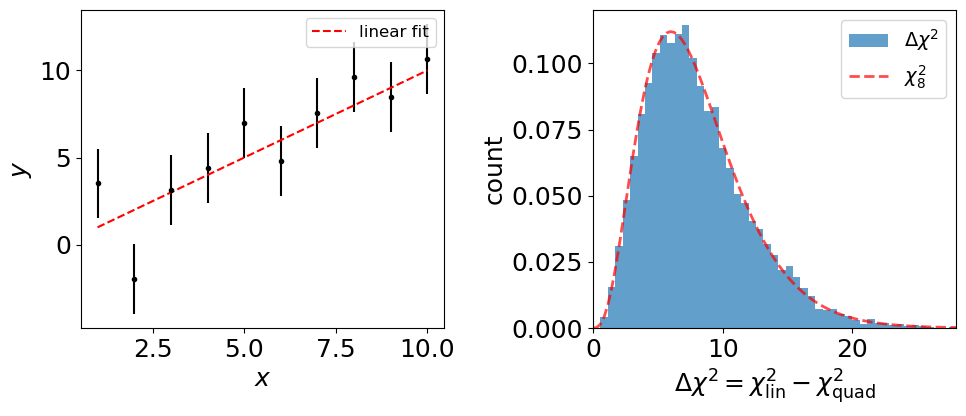

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

ax1.errorbar(x, y, yerr=sigma_y, fmt='.', color='k')
ax1.plot(x, x, 'r--', label='linear fit')

ax1.set(xlabel='$x$', ylabel='$y$')
ax1.legend(fontsize=12)

# Histogram the delta-chi2 values.
dmin = np.floor(np.min(lchi2))
dmax = np.ceil(np.max(lchi2))
ax2.hist(lchi2, bins=np.linspace(dmin, dmax, 50),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

# Plot the chi2 function with 1 DOF.
df = 8
_x = np.linspace(dmin, dmax, 100)
rv = chi2(df)
ax2.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{df}$')

ax2.set(xlabel=r'$\Delta\chi^2=\chi^2_{\mathrm{lin}}-\chi^2_{\mathrm{quad}}$',
        xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

Here is the linear $\chi^2$. The DoF is 8 this time, as we have 2 fitting parameters over 10 data points, and 10-2=8. So, it is different from part a, as we have actual free parameters.


*c).* If we increase or decrease the error to be either too large or too small, we will get that the $\chi^2$ becomes unreasonably large or almost zero, respectively. We see this below, where we take $\sigma_y = 200$ and $\sigma_y = 0.002$.

In [9]:
def chi2l(params,x,y,sigma):
    'A riveting function.'
    m,b = params
    return np.sum(((y - (m*x+b)))**2)

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 200

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,sigma_y), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)

100%|██████████| 10000/10000 [00:10<00:00, 979.15it/s]


In [10]:
print(np.mean(lchi2), np.std(lchi2)**2)

320426.0626768535 25744958872.442368


Clearly, this is too large a $\chi^2$ given our assumptions! Now for an error that is too small:

In [11]:

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 0.002

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,sigma_y), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)

100%|██████████| 10000/10000 [00:02<00:00, 3364.89it/s]


In [12]:
print(np.mean(lchi2), np.std(lchi2)**2)

3.202754308634905e-05 2.593875496562174e-10


An unreasonably small $\chi^2$!